# Random Forest- Classification - Fraud data

After performing data cleaning, analysis and modelling using Decision Tree algorithm. We shall continue and apply random forest algorithm on the same.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Fraud_check_modified.csv')
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,1,50047,10,1,0,1
1,1,1,134075,18,1,0,0
2,0,1,160205,30,1,1,0
3,1,1,193264,15,1,0,1
4,0,1,27533,28,0,1,0


In [6]:
X = df.drop(columns='Taxable.Income')
y = df['Taxable.Income']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(X_train,y_train)
print(classification_report(y_test,model.predict(X_test)))



              precision    recall  f1-score   support

           0       0.17      0.05      0.08        37
           1       0.79      0.93      0.86       143

    accuracy                           0.75       180
   macro avg       0.48      0.49      0.47       180
weighted avg       0.66      0.75      0.70       180



In [58]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[30,50,100,200],'criterion':['gini','entropy'],'bootstrap':['True','False'],'max_depth':[5,10,15,None]}
grid = GridSearchCV(model, param_grid=param_grid,verbose=2)

In [ ]:
grid.fit(X_train,y_train)

In [61]:
print(classification_report(y_test,grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.10      0.03      0.04        37
           1       0.79      0.94      0.86       143

    accuracy                           0.75       180
   macro avg       0.44      0.48      0.45       180
weighted avg       0.65      0.75      0.69       180



In [ ]:
# We are dealing with an imbalanced dataset. Here precision,recall and f1-score for class 0 is poor.

In [62]:
grid.best_params_

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': None,
 'n_estimators': 50}

In [64]:
grid.best_score_

0.7452380952380953

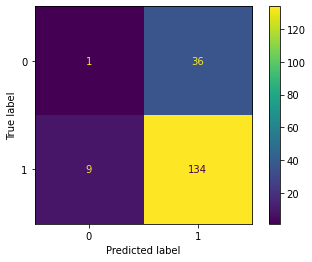

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid,X_test,y_test);

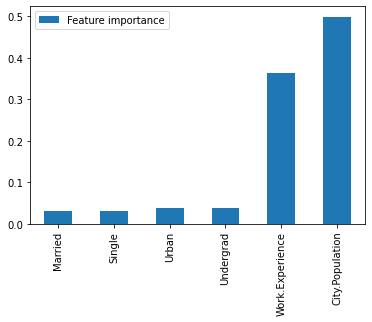

In [86]:
# Feature importance
model = RandomForestClassifier(class_weight='balanced',random_state=42,bootstrap=True,criterion= 'gini',max_depth=None,n_estimators= 65)
model.fit(X_train,y_train)
feat = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Feature importance'])
feat.sort_values(by='Feature importance').plot(kind='bar')

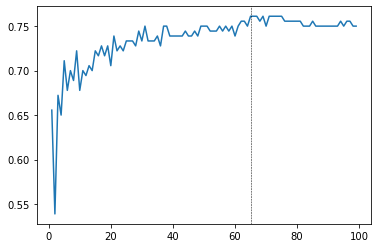

In [85]:
# OPTIMIZING n_estimators
from sklearn.metrics import accuracy_score

accuracy = []
for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n,class_weight='balanced',random_state=42,bootstrap=True,criterion= 'gini',max_depth=None)
    model.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,model.predict(X_test)))

plt.plot(range(1,100),accuracy,label='Accuracy')
plt.axvline(x=65,ls='--',color='k',lw=0.5)

In [84]:
accuracy.index(max(accuracy))

64

# Thank you!